In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from numpy.random import uniform
import random
from KMEANS import kmeans
from Visualization import visualization, interactive_visualization

In [2]:
df = pd.read_csv('haberman-clustering.csv')

In [3]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [4]:
#Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
#Renaming the columns
df_normalized.columns = df.columns
pd.reset_option('display.max_rows')
df_normalized

,Age,Op_year,axil_nodes
0,-0.987066,-0.135932,-0.084991
1,-0.923446,0.281903,-0.260341
2,-0.846824,-0.514674,-0.134166
3,-0.952356,0.304282,-0.020764
4,-0.727400,-0.611527,0.311326
...,...,...,...
277,0.968856,-0.132837,-0.208979
278,0.845136,0.483892,-0.227142
279,0.960414,0.268117,-0.075625
280,0.949931,0.254811,-0.180838


In [5]:
k = 2
data = df_normalized.values
clusters, centroids = kmeans(data, k)

In [6]:
# Calculate metrics
ch_index = calinski_harabasz_score(df_normalized, clusters)
silhouette_avg = silhouette_score(df_normalized, clusters)
db_index = davies_bouldin_score(df_normalized, clusters)

print("Silhouette Score:", silhouette_avg)
print("Calinski Harabasz Score:", ch_index)
print("Davies Bouldin Index:", db_index)

Silhouette Score: 0.32789550968295733
Calinski Harabasz Score: 139.9440697555255
Davies Bouldin Index: 1.3570695931648173


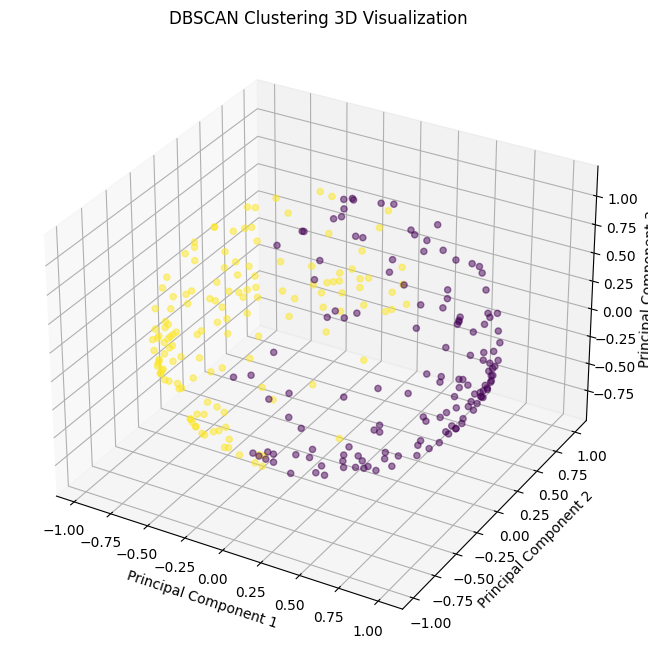

In [7]:
visualization(df_normalized, clusters)

In [8]:
interactive_visualization(df_normalized, clusters)

In [9]:
print(clusters.tolist().count(1))

141
